#Import

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#Functions

In [0]:
def generateX(n,m):
  temp=np.ones((n,1))
  temp2 = np.random.normal(0, 1, (n, m))
  X=np.concatenate((temp,temp2),axis=1)
  return X,temp,temp2


def generateWeight(n,m):
  W=np.random.normal(0,1,(m+1,1))
  return W


def generateNoise(n,m):
  N=np.random.normal(0,0.5,(n,1))
  return N;

def catagorize(n,Y):
	for i in range(0,n):
		if(Y[i]>=0.5):
			Y[i]=1
		else:
			Y[i]=0
	return Y


def difference(yht, y):
	return(np.square(yht-y).mean())

def sigmoid(z):
	Y = np.exp(-1*z)
	Y = 1/(1+Y)
	return(Y)

def gradient(yht,y,X):
	Xt = np.transpose(X)
	return (np.matmul(Xt,(yht-y)))

def logisticregression(n,m,X,Y):
	alpha = 0.00001
	tolerance = 1e-10
	currentweight=generateWeight(n,m)
	while(1):
		previousweight = currentweight
		Yht = np.matmul(X,currentweight)
		Yht = sigmoid(Yht)
		currentweight = currentweight - alpha*(gradient(Yht,Y,X))
		if(difference(previousweight,currentweight) <= tolerance):
			break
	return currentweight,Yht


#Driver Code

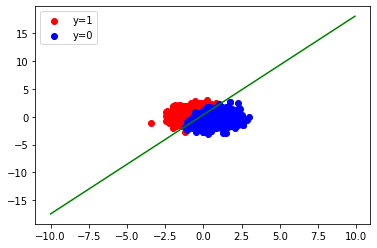

[[-0.21661703]
 [-1.0353258 ]
 [ 0.59146718]]
[[-0.77240533]
 [-3.68319956]
 [ 2.06553032]]


In [10]:
n = 1000
m = 2

X,temp,temp2=generateX(n,m)

w=generateWeight(n,m)


Y = np.matmul(X,w) 
N=generateNoise(n,m)
Yn = Y+N
Y = sigmoid(Yn)

Y=catagorize(n,Y)




z1 = np.array([])
z2 = np.array([])
o1 = np.array([])
o2 = np.array([])		

for i in range(0,n):
	if(Y[i]==1):
		o1 = np.append(o1,[X[i][1]])
		o2 = np.append(o2,[X[i][2]])
	else:
		z1 = np.append(z1,[X[i][1]])
		z2 = np.append(z2,[X[i][2]])

plt.scatter(o1,o2,color='r',label='y=1')
plt.legend(loc='best')
plt.scatter(z1,z2,color='b',label='y=0')
plt.legend(loc='best')


currentweight,Yht=logisticregression(n,m,X,Y)


xrange = np.arange(-10,10,0.1)
yrange = (-currentweight[0]-currentweight[1]*xrange)/currentweight[2];
plt.plot(xrange,yrange,color='g')
plt.show()
print(w)
print(currentweight)